In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append("../tools")
from utils import get_histograms

/home/lsaland/micromamba/envs/clip/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = load_from_disk("../../data/medium_QF_40_features/train").shuffle(seed=7)
data

Dataset({
    features: ['id', 'image', 'label', 'features'],
    num_rows: 1000
})

In [5]:
n_images = 10

X = data["image"]
y = data["label"]
get_label = lambda i : "real" if i == 1 else "fake"

real_images = []
fake_images = []

i = 0
while len(real_images) != n_images or len(fake_images) != n_images:
    if get_label(y[i]) == "real" and len(real_images) < n_images:
        real_images.append(X[i])
    elif get_label(y[i]) == "fake" and len(fake_images) < n_images:
        fake_images.append(X[i])
    i += 1

In [6]:
real_histograms = np.array([(get_histograms(im,"RGB"), get_histograms(im,"HSV")) for im in real_images])
fake_histograms = np.array([(get_histograms(im,"RGB"), get_histograms(im,"HSV")) for im in fake_images])

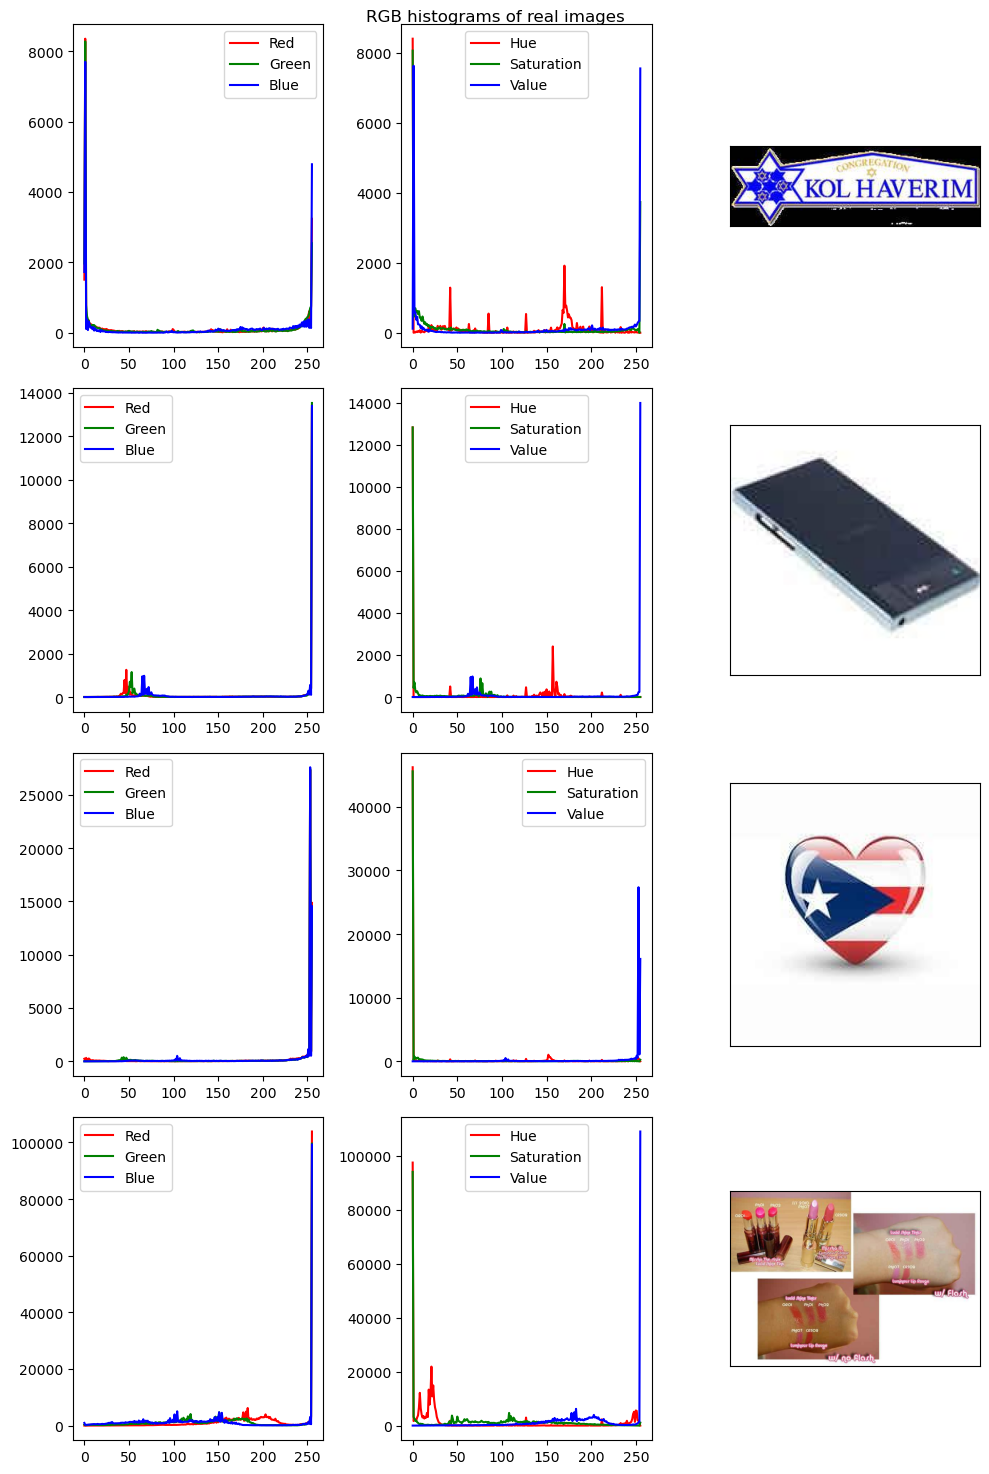

In [ ]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of real images")
fig.set_tight_layout(True)
label = lambda j : ("Red", "Green", "Blue") if j == 0 else ("Hue","Saturation","Value")
for i in range(n_images):
    for j in range(2):
        axs[i,j].plot(real_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(real_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(real_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
    axs[i,2].imshow(np.asarray(real_images[i]))
    axs[i,2].set_xticks([])
    axs[i,2].set_yticks([])
plt.show()

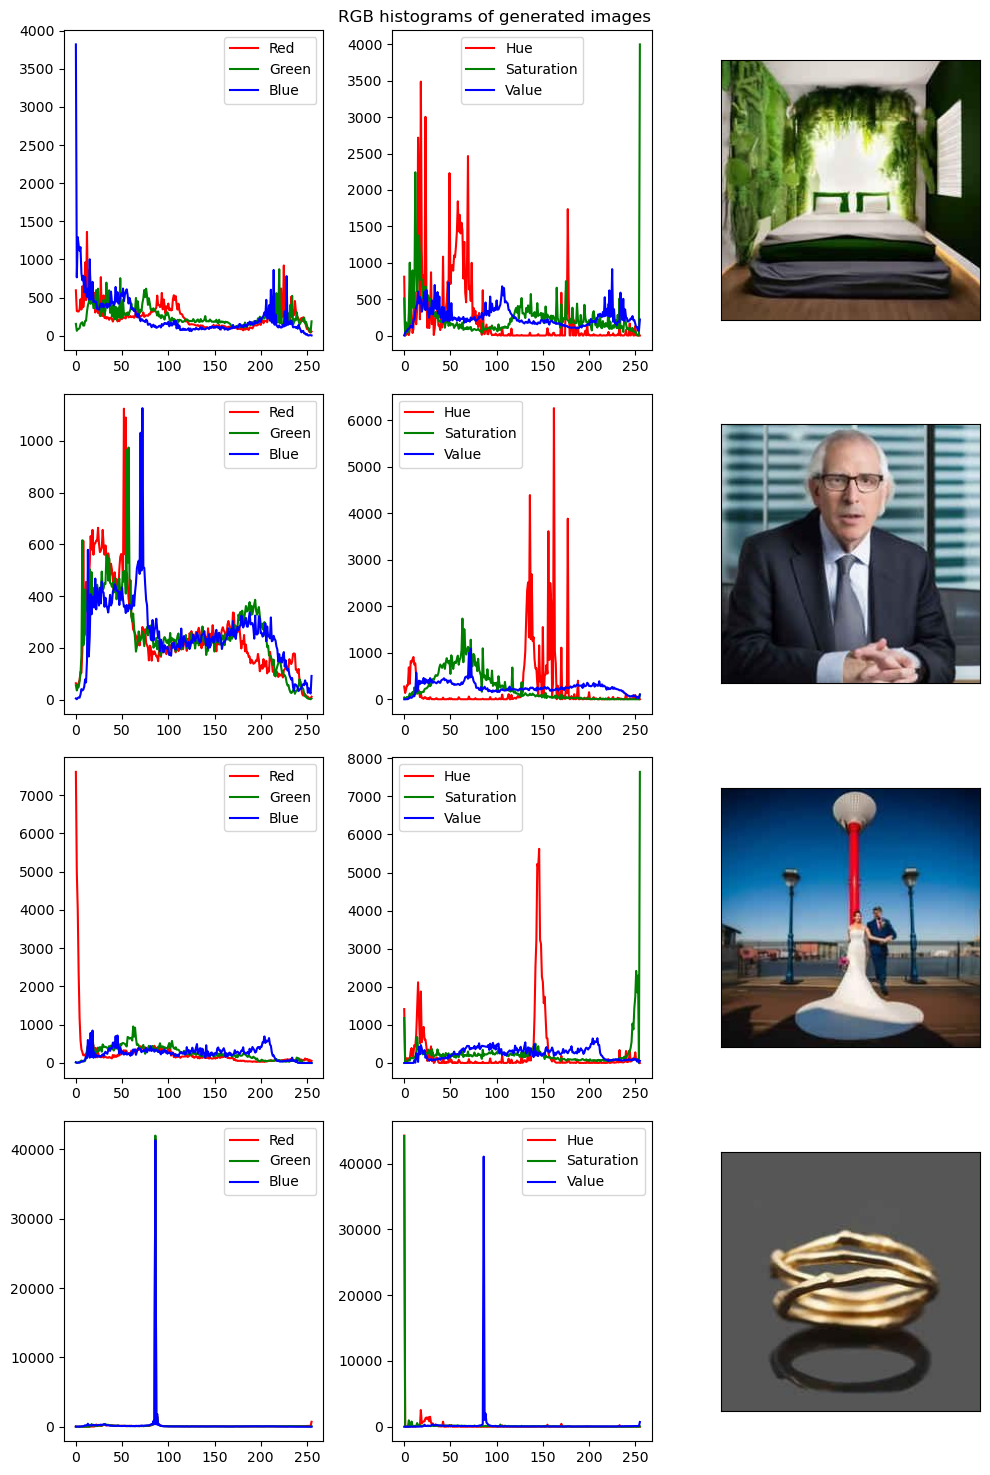

In [9]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of generated images")
fig.set_tight_layout(True)
label = lambda j : ("Red", "Green", "Blue") if j == 0 else ("Hue","Saturation","Value")
for i in range(n_images):
    for j in range(2):
        axs[i,j].plot(fake_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(fake_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(fake_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
    axs[i,2].imshow(np.asarray(fake_images[i]))
    axs[i,2].set_xticks([])
    axs[i,2].set_yticks([])
plt.show()

## RGB -> YCbCr

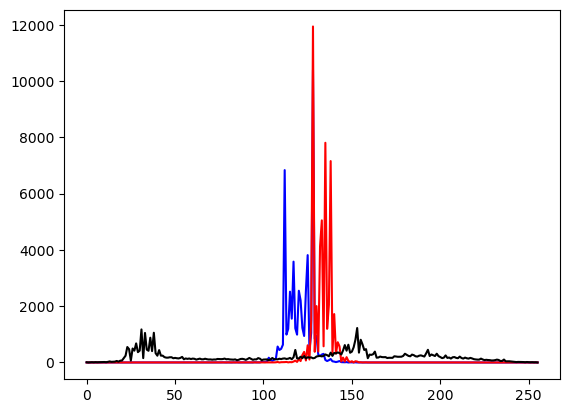

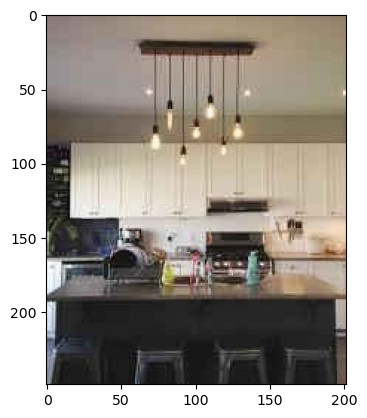

In [54]:
img = real_images[8]
y, cb, cr = img.convert("YCbCr").split()
y, cb, cr = get_histograms(img=img,mode="YCbCr")
plt.plot(cb,"-b")
plt.plot(cr,"-r")
plt.plot(y,"-k")
plt.show()
plt.imshow(np.asarray(img))

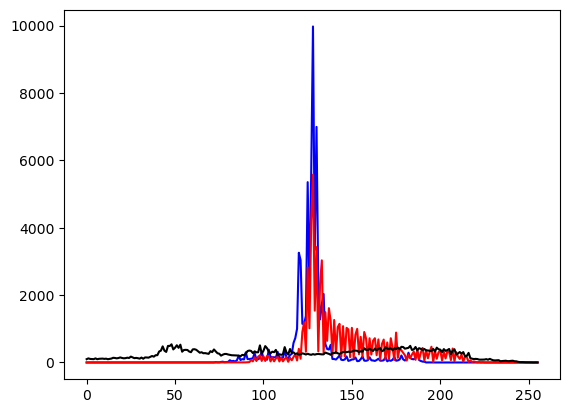

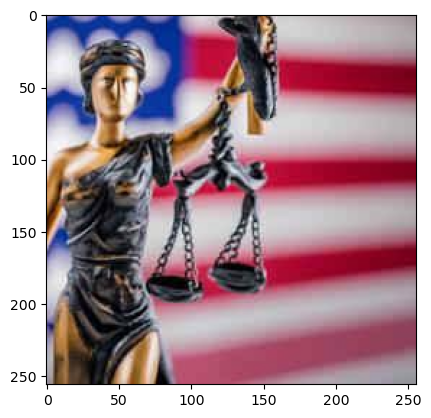

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 5, 4, 16, 23, 8, 12, 17, 66, 36, 47, 28, 67, 201, 73, 100, 89, 302, 100, 101, 111, 125, 277, 86, 96, 128, 324, 118, 113, 82, 381, 160, 156, 156, 146, 318, 132, 149, 138, 352, 158, 111, 221, 252, 581, 726, 1002, 3257, 3036, 1146, 1150, 1380, 5353, 2000, 5627, 9975, 3344, 6994, 2276, 1279, 1728, 2033, 547, 400, 383, 524, 104, 102, 88, 142, 211, 81, 71, 90, 180, 47, 63, 89, 92, 150, 40, 44, 100, 177, 55, 50, 66, 154, 65, 59, 46, 73, 112, 53, 54, 65, 155, 35, 69, 49, 79, 160, 53, 62, 88, 206, 92, 59, 101, 290, 131, 102, 94, 144, 337, 73, 44, 26, 22, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
img = fake_images[7]
y, cb, cr = img.convert("YCbCr").split()
y, cb, cr = get_histograms(img=img,mode="YCbCr")
plt.plot(cb,"-b")
plt.plot(cr,"-r")
plt.plot(y,"-k")
plt.show()
plt.imshow(np.asarray(img))
plt.show()
print(cb)

In [7]:
img_ycbcr = np.asarray(fake_images[7].convert("YCbCr"))
hist_cb, bin_edges_cb = np.histogram(img_ycbcr[:,:,1],bins=30)

In [11]:
img_ycbcr[:,:,1].shape

(256, 256)

In [19]:
hist, bin_edges = np.histogram(img_ycbcr[:,:,1].flatten(),bins=64)
hist

array([   11,     9,    39,    20,    83,    83,    95,   274,   189,
         402,   101,   236,   363,   224,   442,   195,   541,   312,
         464,   281,   490,   158,   332,   833,  1728,  6293,  2296,
        6733,  7627, 13319,  9270,  1279,  3761,   947,   907,   206,
         230,   292,   161,   227,   152,   242,    40,   144,   232,
         116,   219,   105,   185,   107,   220,   104,   128,   160,
         115,   294,   151,   391,   233,   238,   410,    70,    23,
           4])